(English version below)

# FR - Etude de marché sur le vin

Le client, le Domaine des Croix, cherche à **définir le prix** de ses bouteilles de vin **pour le marché américain**. Il a récupéré un jeu de données de 130k bouteilles de vin, avec les cépages, les pays et région de production, les millésimes (c'est-à-dire les années de production), ainsi que des notes ("points") et descriptifs d'oenologues (les spécialistes du vin), et le prix en dollars de toutes ces bouteilles sur le marché américain.

**L'objectif sera de faire une présentation de l'analyse du marché, et du prix que tu conseilles de fixer pour les vins du client.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer comment les prix ont été fixés, sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.

Tu trouveras ci-dessous des trames pour te guider dans cette analyse. Effectue tout d'abord la trame commune. Puis, tu peux suivre l'une de ces trames (Machine Learning ou Business Intelligence). **Ne cherche pas à effectuer les deux trames ! Choisir, c'est renoncer. Le client préfère un travail qualitatif plutôt qu'un travail exhaustif.**
Mais tu peux aussi partir dans d'autres directions pour répondre à la problématique du client. Si tu as des bonnes idées à proposer au client, elles sont évidemment les bienvenues. C'est toi le Data Analyst maintenant. 




# Jeux de données
- Dataset des 130k vins : https://github.com/murpi/wilddata/raw/master/wine.zip
- Dataset des 14 vins du Domaine des Croix : https://github.com/murpi/wilddata/raw/master/domaine_des_croix.csv


# Livrables attendus
Le client souhaite une présentation de 10 minutes suivi de 10 minutes de questions. 
La présentation contiendra a minima ces éléments :
- Rappel du contexte et de la problématique
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés
- Présentation de la partie technique et du code créé pour cette analyse
- Réponse à la question métier : proposition de prix ou de fourchette de prix au client pour être correctement positionné face à la concurrence sur le marché américain

# Common framework: data preparation and exploratory analysis





## FR - Preprocessing
La colonne "title" contient le domaine, le millésime et le cépage ("variety"). Tu dois isoler le millésime (l'année) dans une colonne dédiée.


## Analyse du marché
Le Domaine des Croix souhaiterait une analyse descriptive du marché du vin. Tu vas donc réaliser un ensemble de dataviz, avec l'outil de ton choix (Seaborn, Plotly, Excel, PowerBI, Tableau, etc...). Par exemple : 
- la répartition du nombre de vins par pays
- les pays qui ont les meilleures notes
- les moyennes de notes par cépage
- la répartition par décile
- etc...

Le client souhaiterait un zoom spécifique sur le cépage ("variety") Pinot Noir.


## Descriptions
Quels sont les mots qui ressortent le plus dans les descriptions des vins ? Et spécifiquement pour le pinot noir, est-ce très différent ?  Et pour la province Burgundi en France ?



# Framework: Business Intelligence



## FR - Analyse comparative

L'objectif ici sera de comparer chacun des vins du client par rapport à ses concurrents sur le marché. Par exemple, comparer les tarifs pratiqués pour les vins français, puis de plus en plus précisément, les vins de Bourgogne puisque notre client est en Bourgogne, puis les Pinot Noir bourguignons de la même année.
N'hésite pas à être original dans la présentation et les dataviz utilisées. Utilise toutes les fonctionnalités de Business Intelligence dans un tableau de bord pour aider au mieux le client à se comparer (infobulles, filtres, etc...).

## Proposition de valeur

Avec le tableau de bord que tu lui as fourni, le client a une idée précise de ses concurrents. Fais lui une proposition de prix en fonction de sa volonté de positionnement (par exemple : "si vous souhaitez vous positionner sur le haut de gamme, les 25% les plus chers de vos concurrents sont à ce tarif, nous vous conseillons donc de vous aligner sur ce prix").

## Qualité esthétique du tableau de bord

Essaye de garder un oeil critique et visuel sur ton tableau de bord. La forme compte autant que le fond pour le client qui n'est pas data analyst. Pense donc à "vendre" ton analyse. Par exemple, avec des couleurs s'inspirant du milieu vinicole, des dataviz originales, etc...

# It's up to you now:

# 💾  Import

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
import plotly.express as px

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
link = "https://github.com/murpi/wilddata/raw/master/wine.zip"
df = pd.read_csv(link)

In [ ]:
df.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2016, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   20.0              Douro   
2                                 NaN      87   18.0             Oregon   
3                Reserve Late Harvest      87   18.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   44.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2017 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2015 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2017 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2017 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2016 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [ ]:
link_deux = "https://raw.githubusercontent.com/murpi/wilddata/master/domaine_des_croix.csv"
df_domaine = pd.read_csv(link_deux)

In [ ]:
df_domaine.head()

country                                        description  \
0  France  Firm and solid with great swathes of black fru...   
1  France  A rich wine with great fruits as well as struc...   
2  France  A perfumed village wine, this is made from fou...   
3  France  A structured wine, packed with red fruits and ...   
4  France  This wine is perfumed with cherries and red be...   

              designation  points  price  province       region_1  region_2  \
0                     NaN      94    NaN  Burgundy  Corton Grèves       NaN   
1       La Vigne au Saint      94    NaN  Burgundy         Corton       NaN   
2                     NaN      90    NaN  Burgundy         Beaune       NaN   
3                     NaN      90    NaN  Burgundy         Beaune       NaN   
4  Les Grèves Premier Cru      94    NaN  Burgundy         Beaune       NaN   

  taster_name taster_twitter_handle  \
0  Roger Voss            @vossroger   
1  Roger Voss            @vossroger   
2  Roger Voss            @vossroger   
3  Roger Voss            @vossroger   
4  Roger Voss            @vossroger   

                                               title     variety  \
0              Domaine des Croix 2016  Corton Grèves  Pinot Noir   
1  Domaine des Croix 2017 La Vigne au Saint  (Cor...  Pinot Noir   
2                     Domaine des Croix 2016  Beaune  Pinot Noir   
3                     Domaine des Croix 2019  Beaune  Pinot Noir   
4  Domaine des Croix 2017 Les Grèves Premier Cru ...  Pinot Noir   

              winery  
0  Domaine des Croix  
1  Domaine des Croix  
2  Domaine des Croix  
3  Domaine des Croix  
4  Domaine des Croix

# 🔍  I - Exploration

* df_domaine = df du domaine de la croix
* df = df des vins 

## A -  Exploration / états des lieux des deux df

In [ ]:
df_domaine.shape

(14, 13)

In [ ]:
df_domaine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                14 non-null     object 
 1   description            14 non-null     object 
 2   designation            9 non-null      object 
 3   points                 14 non-null     int64  
 4   price                  0 non-null      float64
 5   province               14 non-null     object 
 6   region_1               14 non-null     object 
 7   region_2               0 non-null      float64
 8   taster_name            14 non-null     object 
 9   taster_twitter_handle  14 non-null     object 
 10  title                  14 non-null     object 
 11  variety                14 non-null     object 
 12  winery                 14 non-null     object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.5+ KB


In [ ]:
df_domaine.describe()

points  price  region_2
count  14.000000    0.0       0.0
mean   92.928571    NaN       NaN
std     1.859044    NaN       NaN
min    90.000000    NaN       NaN
25%    92.000000    NaN       NaN
50%    93.500000    NaN       NaN
75%    94.000000    NaN       NaN
max    95.000000    NaN       NaN

In [ ]:
df.shape

(129957, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129894 non-null  object 
 1   description            129957 non-null  object 
 2   designation            92497 non-null   object 
 3   points                 129957 non-null  int64  
 4   price                  120964 non-null  float64
 5   province               129894 non-null  object 
 6   region_1               108710 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103713 non-null  object 
 9   taster_twitter_handle  98744 non-null   object 
 10  title                  129957 non-null  object 
 11  variety                129956 non-null  object 
 12  winery                 129957 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [ ]:
df.describe()

points          price
count  129957.000000  120964.000000
mean       88.446655      36.390827
std         3.039481      32.802430
min        80.000000       2.000000
25%        86.000000      21.000000
50%        88.000000      29.000000
75%        91.000000      42.000000
max       100.000000    1902.000000

## B - Exploration par colonnes

### Dataframe général sur le vin : df

#### a - Les pays - Colonne "country" 

In [ ]:
df['country'].value_counts()

US                        54504
France                    22079
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [ ]:
df['country'].describe()

count     129894
unique        43
top           US
freq       54504
Name: country, dtype: object

In [ ]:
# On recherche les valeurs manquantes

country_nan = df['country'].isna().sum()
country_nan

63

In [ ]:
# On remplace les valeurs manquantes par "inconnu"

df['country'].fillna('inconnu', inplace=True)

In [ ]:
# On vérifie : il n'y a plus de valeurs manquantes

df['country'].isna().sum()

0

In [ ]:
# On regarde combien de pays différent il y a.
# On voit que "inconnu" s'est bien rajouté également
df['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 'inconnu', 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [ ]:
# Il y a bien 44 pays différents sur le df
df['country'].nunique()

44

#### b - Designation

In [ ]:
# On vérifie les valeurs manquantes
df['designation'].isna().sum()

37460

In [ ]:
# On remplace les valeurs manquantes
df['designation'].fillna('inconnu', inplace=True)

In [ ]:
# On vérifie : il n'y a plus de valeurs manquantes
df['designation'].isna().sum()

0

In [ ]:
df['designation'].value_counts()

inconnu                          37460
Reserve                           2009
Estate                            1322
Reserva                           1259
Riserva                            698
                                 ...  
Ilercavònia                          1
VA                                   1
Sein                                 1
Vigna Riserva                        1
Lieu-dit Harth Cuvée Caroline        1
Name: designation, Length: 37976, dtype: int64

#### c - Description des vins

In [ ]:
# On vérifie les valeurs manquantes
df['description'].isna().sum()

0

#### d - Points - Colonne points

In [ ]:
# On vérifie la répartition des points 
df['points'].value_counts()

88     17207
87     16933
90     15407
86     12600
89     12226
91     11359
92      9611
85      9530
93      6487
84      6480
94      3754
83      3025
82      1836
95      1532
81       692
96       523
80       397
97       229
98        77
99        33
100       19
Name: points, dtype: int64

In [ ]:
# On regarde les stats sur la colonne points
df['points'].describe()

count    129957.000000
mean         88.446655
std           3.039481
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

* Le max des points est de 100
* Un vin tourne en moyenne à 88 points

In [ ]:
# On vérifie les valeurs manquantes
# Il n'y en a pas 
df['points'].isna().sum()

0

#### e - Prix - Colonne price

In [ ]:
df['price'].describe()

count    120964.000000
mean         36.390827
std          32.802430
min           2.000000
25%          21.000000
50%          29.000000
75%          42.000000
max        1902.000000
Name: price, dtype: float64

* Idée : le vin le plus cher est à 1902 dollars et le moins cher à 2 dollars.
* On tourne autour de 36 dollars la bouteille de vin 

In [ ]:
pd.DataFrame(df['price'].value_counts())

price
24.0    4199
21.0    4193
18.0    3986
23.0    3961
22.0    3850
...      ...
564.0      1
540.0      1
314.0      1
315.0      1
276.0      1

[449 rows x 1 columns]

* Les prix qui ressortent le plus sont 24 et 21 dollars la bouteille

In [ ]:
# Vérification des valeurs manquantes
# On a 8993 valeurs manquantes pour le prix
df['price'].isna().sum()

8993

In [ ]:
# On regarde le pourcentage de valeurs manquantes par rapport au df
pourcent_manquantes = round(df['price'].isnull().sum()*100/len(df['price']))
print("Il y a ", pourcent_manquantes, "% de valeurs manquantes.\
Cela étant peu, elles ne seront pas remplacées")


Il y a  7 % de valeurs manquantes.Cela étant peu, elles ne seront pas remplacées


#### f - Province

In [ ]:
df['province'].value_counts()

California        36247
Washington         8639
Bordeaux           5941
Tuscany            5897
Oregon             5373
                  ...  
Messinia              1
Markopoulo            1
Paardeberg            1
Krania Olympus        1
Neuchâtel             1
Name: province, Length: 425, dtype: int64

In [ ]:
df['province'].isna().sum()

63

In [ ]:
df['province'].fillna('inconnu', inplace = True)

In [ ]:
df['province'].unique()

array(['Sicily & Sardinia', 'Douro', 'Oregon', 'Michigan',
       'Northern Spain', 'Alsace', 'Rheinhessen', 'California', 'Mosel',
       'Other', 'Mendoza Province', 'Virginia', 'Beaujolais',
       'Colchagua Valley', 'Southern Italy', 'Maule Valley', 'Bordeaux',
       'Maipo Valley', 'Washington', 'Central Italy', 'Champagne',
       'Burgundy', 'South Australia', 'Tejo', 'Rapel Valley', 'Galicia',
       'France Other', 'Tuscany', 'Burgenland', 'New York',
       'Leyda Valley', 'Piedmont', 'Stellenbosch',
       'Simonsberg-Stellenbosch', 'Walker Bay', 'Alentejano',
       'Central Spain', 'Southwest France', 'Aconcagua Valley',
       'Loncomilla Valley', 'Marlborough', 'Northeastern Italy',
       'Casablanca Valley', 'Veneto', 'Western Cape', 'Judean Hills',
       'Alentejo', 'Coastal Region', 'Rhône Valley', 'Galilee',
       'Beira Atlantico', 'Tokaj', 'Leithaberg', 'Santorini', 'Kremstal',
       'Catalonia', 'Recas', "Hawke's Bay", 'Curicó Valley',
       'Limarí Valley'

In [ ]:
df['province'].nunique()

426

#### g - Variété

In [ ]:
df['variety'].value_counts()

Pinot Noir                    13259
Chardonnay                    11752
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: variety, Length: 707, dtype: int64

In [ ]:
# On vérifie combien de variété différentes il y a
df['variety'].nunique()

707

 Il y a 707 variétés de vin

In [ ]:
df['variety'].unique()

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Nerello Mascalese', 'Chardonnay', 'Malbec',
       'Tempranillo Blend', 'Meritage', 'Red Blend', 'Merlot',
       "Nero d'Avola", 'Chenin Blanc', 'Gamay', 'Sauvignon Blanc',
       'Viognier-Chardonnay', 'Primitivo', 'Catarratto', 'Inzolia',
       'Petit Verdot', 'Monica', 'Bordeaux-style White Blend', 'Grillo',
       'Sangiovese', 'Cabernet Franc', 'Champagne Blend',
       'Bordeaux-style Red Blend', 'Aglianico', 'Petite Sirah',
       'Touriga Nacional', 'Carmenère', 'Albariño', 'Petit Manseng',
       'Rosé', 'Zinfandel', 'Vernaccia', 'Rosato', 'Grüner Veltliner',
       'Viognier', 'Vermentino', 'Grenache Blanc', 'Syrah', 'Nebbiolo',
       'Shiraz-Cabernet Sauvignon', 'Pinot Blanc', 'Alsace white blend',
       'Barbera', 'Rhône-style Red Blend', 'Portuguese White', 'Graciano',
       'Tannat-Cabernet', 'Sauvign

In [ ]:
# On vérifie les valeurs manquantes
df['variety'].isna().sum()

1

In [ ]:
# On remplace la valeur manquante par "inconnu"
df['variety'].fillna('inconnu', inplace=True)

In [ ]:
# On vérifie, il n'y a plus de valeurs manquantes
df['variety'].isna().sum()

0

#### h - Domaine

In [ ]:
df['winery'].value_counts()

Wines & Winemakers             222
Testarossa                     218
DFJ Vinhos                     215
Williams Selyem                211
Louis Latour                   199
                              ... 
Domaine de l'Aurage              1
Maestro di Antichi Castelli      1
Domaine de Chevilly              1
Dovev                            1
Penedo Borges                    1
Name: winery, Length: 16756, dtype: int64

In [ ]:
# On vérifie combien de domaine différents il y a
df['winery'].nunique()

16756

Il y a 16756 domaines différents

In [ ]:
# On vérifie si il y a des valeurs manquantes
# Pas de valeurs manquantes
df['winery'].isna().sum()

0

#### i - Région 1

In [ ]:
df['region_1'].value_counts()

Napa Valley                    4480
Columbia Valley (WA)           4124
Russian River Valley           3091
California                     2629
Paso Robles                    2350
                               ... 
Trentino Superiore                1
Grave del Friuli                  1
Vin Santo di Carmignano           1
Vino de la Tierra de Zamora       1
Paestum                           1
Name: region_1, Length: 1228, dtype: int64

In [ ]:
# On vérifie les valeurs manquantes
df['region_1'].isna().sum()

21247

In [ ]:
# On regarde le pourcentage de valeurs manquantes par rapport au df
prcent_manquante = round(df['region_1'].isnull().sum()*100/len(df['region_1']))
print("Il y a ", prcent_manquante, "% de valeurs manquantes")

Il y a  16 % de valeurs manquantes


* Il y a trop de valeurs manquantes dans cette colonne, on ne la garde pas.

#### j - Région 2

In [ ]:
df['region_2'].value_counts()

Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
California Other      2663
Finger Lakes          1777
Sierra Foothills      1462
Napa-Sonoma           1169
Central Valley        1062
Southern Oregon        917
Oregon Other           727
Long Island            680
North Coast            584
Washington Other       534
South Coast            272
New York Other         231
Name: region_2, dtype: int64

In [ ]:
# On vérifie les valeurs manquantes
df['region_2'].isna().sum()

79446

In [ ]:
# On regarde le pourcentage de valeurs manquantes par rapport au df
prct_manquante = round(df['region_2'].isnull().sum()*100/len(df['region_2']))
print("Il y a ", prct_manquante, "% de valeurs manquantes")

Il y a  61 % de valeurs manquantes


* Il y a trop de valeurs manquantes dans cette colonne, on ne la garde pas.

#### k - Taster name

In [ ]:
df['taster_name'].value_counts()

Roger Voss            25500
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [ ]:
# On regarde les valeurs manquantes
df['taster_name'].isna().sum()

26244

In [ ]:
# On regarde le pourcentage de valeurs manquantes
pourcent_manquantes = round(df['taster_name'].isnull().sum()*100/len(df['taster_name']))
print("Il y a ", pourcent_manquantes, "% de valeurs manquantes")

Il y a  20 % de valeurs manquantes


* Il y a beaucoup de valeurs manquantes, mais la colonne n'étant pas du numérique on va remplacer les valeurs manquantes par "inconnu"




In [ ]:
# On remplace les valeurs manquantes
df['taster_name'].fillna('inconnu', inplace=True)

In [ ]:
# On vérifie si inconnu s'est bien substitué
df['taster_name'].unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', 'inconnu', 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

#### l - twitter

In [ ]:
df['taster_twitter_handle'].value_counts()

@vossroger          25500
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1005
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

In [ ]:
df['taster_twitter_handle'].isna().sum()

31213

In [ ]:
# On regarde le pourcentage de valeurs manquantes
pourcent_manquantes = round(df['taster_twitter_handle'].isnull().sum()\
                            * 100 / len(df['taster_twitter_handle']))
print("Il y a ", pourcent_manquantes, "% de valeurs manquantes")

Il y a  24 % de valeurs manquantes


* Il y a beaucoup de valeurs manquantes, mais la colonne n'étant pas du numérique on va remplacer les valeurs manquantes par "inconnu"

In [ ]:
# On remplace les valeurs manquantes
df['taster_twitter_handle'].fillna('inconnu', inplace=True)

In [ ]:
# On vérifie si inconnu s'est bien substitué
df['taster_twitter_handle'].unique()

array(['@kerinokeefe', '@vossroger', '@paulgwine\xa0', 'inconnu',
       '@wineschach', '@vboone', '@mattkettmann', '@wawinereport',
       '@gordone_cellars', '@JoeCz', '@AnneInVino', '@laurbuzz',
       '@worldwineguys', '@suskostrzewa', '@bkfiona', '@winewchristina'],
      dtype=object)

### Dataframe du domaine : df_domaine

#### a - Les pays 

In [ ]:
# On vérifie même si logiquement il n'y a qu'un seul pays : la France
df_domaine['country'].value_counts()

France    14
Name: country, dtype: int64

In [ ]:
# On vérifie les valeurs manquantes
df_domaine['country'].isna().sum()

0

* Pas de valeurs manquantes

#### b - Designation

In [ ]:
df_domaine['designation'].value_counts()

La Vigne au Saint              2
Les Grèves Premier Cru         1
Les Cent-Vignes Premier Cru    1
Grèves                         1
Bressandes Premier Cru         1
Les Bressandes Premier Cru     1
Pertuisots Premier Cru         1
Les Peuillets Premier Cru      1
Name: designation, dtype: int64

In [ ]:
# On regarde les différentes designation
df_domaine['designation'].unique()

array([nan, 'La Vigne au Saint', 'Les Grèves Premier Cru',
       'Les Cent-Vignes Premier Cru', 'Grèves', 'Bressandes Premier Cru',
       'Les Bressandes Premier Cru', 'Pertuisots Premier Cru',
       'Les Peuillets Premier Cru'], dtype=object)

In [ ]:
# On regarde le nombres de designation
df_domaine['designation'].nunique()

8

In [ ]:
# On vérifie les valeurs manquantes
df_domaine['designation'].isna().sum()

5

In [ ]:
# on remplace les 5 valeurs manquantes par "inconnu"
df_domaine['designation'].fillna('inconnu', inplace=True)

In [ ]:
# On vérifie que les valeurs manquantes n'y sont plus
df_domaine['designation'].isna().sum()

0

In [ ]:
# On voit que inconnu s'est bien substitué
df_domaine['designation'].unique()

array(['inconnu', 'La Vigne au Saint', 'Les Grèves Premier Cru',
       'Les Cent-Vignes Premier Cru', 'Grèves', 'Bressandes Premier Cru',
       'Les Bressandes Premier Cru', 'Pertuisots Premier Cru',
       'Les Peuillets Premier Cru'], dtype=object)

#### c - Description des vins

In [ ]:
# On vérifie les valeurs manquantes
df_domaine['description'].isna().sum()

0

#### d - Points

In [ ]:
# On vérifie la répartition des points 
df_domaine['points'].value_counts()

94    4
90    3
95    3
93    2
92    2
Name: points, dtype: int64

In [ ]:
# On regarde les stats sur la colonne points
df_domaine['points'].describe()

count    14.000000
mean     92.928571
std       1.859044
min      90.000000
25%      92.000000
50%      93.500000
75%      94.000000
max      95.000000
Name: points, dtype: float64

* Les points les plus haut ici sont de 95.
* Un vin tourne en moyenne à 93 points.

In [ ]:
# On regarde les valeurs manquantes
df_domaine['points'].isna().sum()

0

* Il n'y a pas de valeurs manquantes pour les points

#### e - Prix

In [ ]:
df_domaine['price'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price, dtype: float64

In [ ]:
# On vérifie les valeurs manquantes
df_domaine['price'].isna().sum()

14

* Il n'y a pas de prix c'est normal.

#### f - Province

In [ ]:
# On regarde si il y a différentes provinces quand même
df_domaine['province'].value_counts()

Burgundy    14
Name: province, dtype: int64

In [ ]:
df_domaine['province'].unique()

array(['Burgundy'], dtype=object)

* On a qu'une seule province, c'est normal

In [ ]:
# On vérifie les valeurs manquantes
df_domaine['province'].isna().sum()

0

* il n'y a pas de valeurs manquantes

#### g - Variété

In [ ]:
df_domaine['variety'].value_counts()

Pinot Noir    13
Chardonnay     1
Name: variety, dtype: int64

In [ ]:
# On vérifie combien de variété différentes il y a
df_domaine['variety'].nunique()

2

* Il n'y a que 2 variétés

In [ ]:
# On vérifie les valeurs manquantes
df_domaine['variety'].isna().sum()

0

* il n'y a pas de valeurs manquantes

#### h - Domaine

In [ ]:
# On vérifie qu'il n'y a bien qu'un seul domaine
df_domaine['winery'].value_counts()

Domaine des Croix    14
Name: winery, dtype: int64

In [ ]:
# On vérifie les valeurs manquantes
df_domaine['winery'].isna().sum()

0

* Pas de valeurs manquantes

#### i - Région 1

In [ ]:
df_domaine['region_1'].value_counts()

Beaune                8
Corton                3
Corton Grèves         1
Corton-Charlemagne    1
Savigny-lès-Beaune    1
Name: region_1, dtype: int64

In [ ]:
# On vérifie les différentes régions
df_domaine['region_1'].unique()

array(['Corton Grèves', 'Corton', 'Beaune', 'Corton-Charlemagne',
       'Savigny-lès-Beaune'], dtype=object)

In [ ]:
df_domaine['region_1'].nunique()

5

In [ ]:
# On vérifie les valeurs manquantes
df_domaine['region_1'].isna().sum()

0

* Pas de valeurs manquantes

#### j - Région 2 

In [ ]:
df_domaine['region_2'].value_counts()

Series([], Name: region_2, dtype: int64)

In [ ]:
# On vérifie les valeurs manquantes
df_domaine['region_2'].isna().sum()

14

In [ ]:
# On regarde le pourcentage de valeurs manquantes par rapport au df
pourcent_manquantes = round(df_domaine['region_2'].isnull().sum()\
                            * 100 / len(df_domaine['region_2']))
print("Il y a ", pourcent_manquantes, "% de valeurs manquantes")

Il y a  100 % de valeurs manquantes


* Trop de valeurs manquantes, on ne les remplace pas et on ne gardera pas la colonne

#### k - Taster name

In [ ]:
df_domaine['taster_name'].value_counts()

Roger Voss    14
Name: taster_name, dtype: int64

In [ ]:
# On vérifie qu'il n'y a bien qu'un taster name
df_domaine['taster_name'].unique()

array(['Roger Voss'], dtype=object)

In [ ]:
df_domaine['taster_name'].nunique()

1

In [ ]:
# On regarde les valeurs manquantes
df_domaine['taster_name'].isna().sum()

0

* Pas de valeurs manquantes

#### l - Twitter

In [ ]:
df_domaine['taster_twitter_handle'].value_counts()

@vossroger    14
Name: taster_twitter_handle, dtype: int64

In [ ]:
# On vérifie qu'il n'y a bien qu'un taster name
df_domaine['taster_twitter_handle'].unique()

array(['@vossroger'], dtype=object)

In [ ]:
df_domaine['taster_twitter_handle'].nunique()

1

In [ ]:
df_domaine['taster_twitter_handle'].isna().sum()

0

* Pas de valeurs manquantes

# 🗓 II - Création d'une colonne pour les dates

* Analyse : les deux df ne comportent pas de colonne concernant l'année du vin. D'un point de vue métier l'année d'un vin est importante. Elle peut jouer sur sa notation mais aussi et surtout sur le prix de celui-ci.

In [ ]:
# On test extract pour garder que la date
test = pd.Series('Domaine des Croix 2016 Corton Grèves')
test.str.extract(r'(\d{4})')

0
0  2016

In [ ]:
# C'est ok donc on l'applique à tout le df_domaine et on crée une colonne
df_domaine['millesime'] = df_domaine['title'].str.extract(r'(\d{4})')

In [ ]:
df_domaine.head(1)

country                                        description designation  \
0  France  Firm and solid with great swathes of black fru...     inconnu   

   points  price  province       region_1  region_2 taster_name  \
0      94    NaN  Burgundy  Corton Grèves       NaN  Roger Voss   

  taster_twitter_handle                                  title     variety  \
0            @vossroger  Domaine des Croix 2016  Corton Grèves  Pinot Noir   

              winery millesime  
0  Domaine des Croix      2016

In [ ]:
df['millesime'] = df['title'].str.extract(r'(\d{4})')

In [ ]:
df.head(1)

country                                        description   designation  \
0   Italy  Aromas include tropical fruit, broom, brimston...  Vulkà Bianco   

   points  price           province region_1 region_2    taster_name  \
0      87    NaN  Sicily & Sardinia     Etna      NaN  Kerin O’Keefe   

  taster_twitter_handle                              title      variety  \
0          @kerinokeefe  Nicosia 2017 Vulkà Bianco  (Etna)  White Blend   

    winery millesime  
0  Nicosia      2017

# 🧮 III - Création de df supplémentaires

* Pour faire des analyses précises et des visualisations plus simples à réaliser on crée des df sur des points précis de l'analyse à fournir au client.
* Nécessaire pour la description des mots NLP

## A - Création d'un df de vin français

In [ ]:
# on garde que le pays france dans la colonne country
df_vin_france = df[df['country'] == 'France']
df_vin_france

country                                        description  \
7       France  This dry and restrained wine offers spice in p...   
9       France  This has great depth of flavor with its fresh ...   
11      France  This is a dry wine, very spicy, with a tight, ...   
30      France  Red cherry fruit comes laced with light tannin...   
42      France  This is a festive wine, with soft, ripe fruit ...   
...        ...                                                ...   
129950  France  Initially quite muted, this wine slowly develo...   
129951  France  While it's rich, this beautiful dry wine also ...   
129954  France  Well-drained gravel soil gives this wine its c...   
129955  France  A dry style of Pinot Gris, this is crisp with ...   
129956  France  Big, rich and off-dry, this is powered by inte...   

                          designation  points  price    province  \
7                             inconnu      87   24.0      Alsace   
9                         Les Natures      87   25.0      Alsace   
11                            inconnu      87   27.0      Alsace   
30                            Nouveau      86    NaN  Beaujolais   
42                            Nouveau      86   15.0  Beaujolais   
...                               ...     ...    ...         ...   
129950   Domaine Saint-Rémy Herrenweg      90    NaN      Alsace   
129951    Seppi Landmann Vallée Noble      90   29.0      Alsace   
129954                          Kritt      90   30.0      Alsace   
129955                        inconnu      90   33.0      Alsace   
129956  Lieu-dit Harth Cuvée Caroline      90   28.0      Alsace   

                   region_1 region_2 taster_name taster_twitter_handle  \
7                    Alsace      NaN  Roger Voss            @vossroger   
9                    Alsace      NaN  Roger Voss            @vossroger   
11                   Alsace      NaN  Roger Voss            @vossroger   
30      Beaujolais-Villages      NaN  Roger Voss            @vossroger   
42               Beaujolais      NaN  Roger Voss            @vossroger   
...                     ...      ...         ...                   ...   
129950               Alsace      NaN  Roger Voss            @vossroger   
129951               Alsace      NaN  Roger Voss            @vossroger   
129954               Alsace      NaN  Roger Voss            @vossroger   
129955               Alsace      NaN  Roger Voss            @vossroger   
129956               Alsace      NaN  Roger Voss            @vossroger   

                                                    title         variety  \
7                   Trimbach 2016 Gewurztraminer (Alsace)  Gewürztraminer   
9       Jean-Baptiste Adam 2016 Les Natures Pinot Gris...      Pinot Gris   
11                Leon Beyer 2016 Gewurztraminer (Alsace)  Gewürztraminer   
30      Domaine de la Madone 2016 Nouveau  (Beaujolais...           Gamay   
42                 Henry Fessy 2016 Nouveau  (Beaujolais)           Gamay   
...                                                   ...             ...   
129950  Domaine Ehrhart 2017 Domaine Saint-Rémy Herren...  Gewürztraminer   
129951  Domaine Rieflé-Landmann 2017 Seppi Landmann Va...      Pinot Gris   
129954  Domaine Gresser 2017 Kritt Gewurztraminer (Als...  Gewürztraminer   
129955      Domaine Marcel Deiss 2016 Pinot Gris (Alsace)      Pinot Gris   
129956  Domaine Schoffit 2016 Lieu-dit Harth Cuvée Car...  Gewürztraminer   

                         winery millesime  
7                      Trimbach      2016  
9            Jean-Baptiste Adam      2016  
11                   Leon Beyer      2016  
30         Domaine de la Madone      2016  
42                  Henry Fessy      2016  
...                         ...       ...  
129950          Domaine Ehrhart      2017  
129951  Domaine Rieflé-Landmann      2017  
129954          Domaine Gresser      2017  
129955     Domaine Marcel Deiss      2016  
129956         Domaine Schoffit      2016  

[22079 rows x 14 c

In [ ]:
# On vérifie qu'on a bien que des vins français
df_vin_france['country'].value_counts()

France    22079
Name: country, dtype: int64

In [ ]:
df_vin_france['country'].unique()

array(['France'], dtype=object)

## B - Création d'un df de vin de Bourgogne

* On en va garder que les vins de bourgogne sur "df" le dataframe global des vins. Le df_domaine ne contient déjà que des vins de bourgogne

In [ ]:
df_vin_bourgogne = df[df['province'] == 'Burgundy']
df_vin_bourgogne

country                                        description  \
65      France  From the warm 2019 vintage, this is a soft and...   
66      France  This soft, rounded wine is ripe with generous ...   
179     France  The impact of 50-year old vines is seen in the...   
193     France  A citrus-dominated wine, lime and lemon giving...   
307     France  Rich and full in the mouth, packed with red fr...   
...        ...                                                ...   
129804  France  Concentrated, with dark tannins to go with the...   
129809  France  Aromas of ripe yellow fruits announce a wine t...   
129811  France  A fresh, juicy wine, with attractive acidity, ...   
129917  France  A powerful, chunky wine, packed with solid tan...   
129922  France  A blend from several premier cru vineyards in ...   

                           designation  points  price  province  \
65                             inconnu      86   18.0  Burgundy   
66                             inconnu      86   15.0  Burgundy   
179     Les Vénérables Vieilles Vignes      88   37.0  Burgundy   
193                            inconnu      87   43.0  Burgundy   
307                Les Dames Huguettes      87   33.0  Burgundy   
...                                ...     ...    ...       ...   
129804                     Les Damodes      89   94.0  Burgundy   
129809                         inconnu      89   64.0  Burgundy   
129811                         inconnu      88   36.0  Burgundy   
129917                         inconnu      91  119.0  Burgundy   
129922                     Premier Cru      91   81.0  Burgundy   

                       region_1 region_2 taster_name taster_twitter_handle  \
65                      Chablis      NaN  Roger Voss            @vossroger   
66        Mâcon-Milly Lamartine      NaN  Roger Voss            @vossroger   
179                     Chablis      NaN  Roger Voss            @vossroger   
193                  St.-Romain      NaN  Roger Voss            @vossroger   
307      Côte de Nuits-Villages      NaN  Roger Voss            @vossroger   
...                         ...      ...         ...                   ...   
129804        Nuits-St.-Georges      NaN  Roger Voss            @vossroger   
129809     Chassagne-Montrachet      NaN  Roger Voss            @vossroger   
129811  Côte de Beaune-Villages      NaN  Roger Voss            @vossroger   
129917         Grands-Echezeaux      NaN  Roger Voss            @vossroger   
129922                  Pommard      NaN  Roger Voss            @vossroger   

                                                    title     variety  \
65                          Simonnet-Febvre 2019  Chablis  Chardonnay   
66      Vignerons des Terres Secrètes 2019  Mâcon-Mill...  Chardonnay   
179     La Chablisienne 2010 Les Vénérables Vieilles V...  Chardonnay   
193                    Bertrand Ambroise 2010  St.-Romain  Chardonnay   
307     Domaine Bertagna 2013 Les Dames Huguettes  (Cô...  Pinot Noir   
...                                                   ...         ...   
129804  Louis Latour 2013 Les Damodes  (Nuits-St.-Geor...  Pinot Noir   
129809    Chanson Père et Fils 2012  Chassagne-Montrachet  Chardonnay   
129811       Camille Giroud 2012  Côte de Beaune-Villages  Pinot Noir   
129917          Henri de Villamont 2009  Grands-Echezeaux  Pinot Noir   
129922   Bouchard Père & Fils 2009 Premier Cru  (Pommard)  Pinot Noir   

                               winery millesime  
65                    Simonnet-Febvre      2019  
66      Vignerons des Terres Secrètes      2019  
179                   La Chablisienne      2010  
193                 Bertrand Ambroise      2010  
307                  Domaine Bertagna      2013  
...                               ...       ...  
129804                   Louis Latour      2013  
129809           Chanson Père et Fils      2012  
129811                 Camille Giroud      2012  
129917             Henri de Villamont      2009  
129922   

In [ ]:
# On vérifie qu'on a bien que des vins de bourgogne
df_vin_bourgogne['province'].value_counts()

Burgundy    3966
Name: province, dtype: int64

In [ ]:
df_vin_bourgogne['province'].unique()

array(['Burgundy'], dtype=object)

## C - Création d'un df de Pinot noir

## 1 - Création d'un df de Pinot noir sur le df global

### a - On vérifie les pinot noirs différents et on crée un df de pinot noir

In [ ]:
df['variety'].unique().tolist()


['White Blend',
 'Portuguese Red',
 'Pinot Gris',
 'Riesling',
 'Pinot Noir',
 'Tempranillo-Merlot',
 'Frappato',
 'Gewürztraminer',
 'Cabernet Sauvignon',
 'Nerello Mascalese',
 'Chardonnay',
 'Malbec',
 'Tempranillo Blend',
 'Meritage',
 'Red Blend',
 'Merlot',
 "Nero d'Avola",
 'Chenin Blanc',
 'Gamay',
 'Sauvignon Blanc',
 'Viognier-Chardonnay',
 'Primitivo',
 'Catarratto',
 'Inzolia',
 'Petit Verdot',
 'Monica',
 'Bordeaux-style White Blend',
 'Grillo',
 'Sangiovese',
 'Cabernet Franc',
 'Champagne Blend',
 'Bordeaux-style Red Blend',
 'Aglianico',
 'Petite Sirah',
 'Touriga Nacional',
 'Carmenère',
 'Albariño',
 'Petit Manseng',
 'Rosé',
 'Zinfandel',
 'Vernaccia',
 'Rosato',
 'Grüner Veltliner',
 'Viognier',
 'Vermentino',
 'Grenache Blanc',
 'Syrah',
 'Nebbiolo',
 'Shiraz-Cabernet Sauvignon',
 'Pinot Blanc',
 'Alsace white blend',
 'Barbera',
 'Rhône-style Red Blend',
 'Portuguese White',
 'Graciano',
 'Tannat-Cabernet',
 'Sauvignon',
 'Sangiovese Grosso',
 'Torrontés',
 'Prugn

In [ ]:
# Pour contenir tout les pinot noir y compris les pinot noir syrah etc 
df_pinotnoir = df[df['variety'].str.contains('Pinot Noir')]
df_pinotnoir

country                                        description  \
4             US  Much like the regular bottling from 2016, this...   
21            US  A sleek mix of tart berry, stem and herb, alon...   
25            US  Oak and earth intermingle around robust aromas...   
35            US  As with many of the Erath 2014 vineyard design...   
41            US  A stiff, tannic wine, this slowly opens and br...   
...          ...                                                ...   
129906        US  Shows the clean, citrus acid juiciness and sil...   
129917    France  A powerful, chunky wine, packed with solid tan...   
129922    France  A blend from several premier cru vineyards in ...   
129946  Portugal  Fresh and fruity, this is full of red cherry f...   
129953        US  Citation is given as much as a decade of bottl...   

                               designation  points  price    province  \
4       Vintner's Reserve Wild Child Block      87   44.0      Oregon   
21                                 inconnu      87   21.0      Oregon   
25                     King Ridge Vineyard      87   51.0  California   
35                                  Hyland      86   41.0      Oregon   
41                                 inconnu      86   25.0      Oregon   
...                                    ...     ...    ...         ...   
129906                 Fiddlestix Vineyard      91   61.0  California   
129917                             inconnu      91  119.0    Burgundy   
129922                         Premier Cru      91   81.0    Burgundy   
129946                             Vértice      90   59.0       Douro   
129953                             inconnu      90   92.0      Oregon   

                 region_1           region_2     taster_name  \
4       Willamette Valley  Willamette Valley    Paul Gregutt   
21                 Oregon       Oregon Other    Paul Gregutt   
25           Sonoma Coast             Sonoma  Virginie Boone   
35            McMinnville  Willamette Valley    Paul Gregutt   
41      Willamette Valley  Willamette Valley    Paul Gregutt   
...                   ...                ...             ...   
129906    Sta. Rita Hills      Central Coast         inconnu   
129917   Grands-Echezeaux                NaN      Roger Voss   
129922            Pommard                NaN      Roger Voss   
129946                NaN                NaN      Roger Voss   
129953             Oregon       Oregon Other    Paul Gregutt   

       taster_twitter_handle  \
4                @paulgwine    
21               @paulgwine    
25                   @vboone   
35               @paulgwine    
41               @paulgwine    
...                      ...   
129906               inconnu   
129917            @vossroger   
129922            @vossroger   
129946            @vossroger   
129953           @paulgwine    

                                                    title     variety  \
4       Sweet Cheeks 2016 Vintner's Reserve Wild Child...  Pinot Noir   
21                       Acrobat 2017 Pinot Noir (Oregon)  Pinot Noir   
25      Castello di Amorosa 2015 King Ridge Vineyard P...  Pinot Noir   
35             Erath 2014 Hyland Pinot Noir (McMinnville)  Pinot Noir   
41      Hawkins Cellars 2013 Pinot Noir (Willamette Va...  Pinot Noir   
...                                                   ...         ...   
129906  Pali 2010 Fiddlestix Vineyard Pinot Noir (Sta....  Pinot Noir   
129917          Henri de Villamont 2009  Grands-Echezeaux  Pinot Noir   
129922   Bouchard Père & Fils 2009 Premier Cru  (Pommard)  Pinot Noir   
129946  Caves Transmontanas 2010 Vértice Pinot Noir (D...  Pinot Noir   
129953                  Citation 2008 Pinot Noir (Oregon)  Pinot Noir   

                      winery millesime  
4               Sweet Cheeks      2016  
21                   Acrobat      2017  
25       Castello di Amorosa      2015  
35                     Erath      2014  
41           Hawkins Cellars      2013  
..

### b - Vérif sur ce nouveau df pinotnoir

In [ ]:
df_pinotnoir.shape

(13281, 14)

In [ ]:
df_pinotnoir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 4 to 129953
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                13281 non-null  object 
 1   description            13281 non-null  object 
 2   designation            13281 non-null  object 
 3   points                 13281 non-null  int64  
 4   price                  12798 non-null  float64
 5   province               13281 non-null  object 
 6   region_1               12125 non-null  object 
 7   region_2               9039 non-null   object 
 8   taster_name            13281 non-null  object 
 9   taster_twitter_handle  13281 non-null  object 
 10  title                  13281 non-null  object 
 11  variety                13281 non-null  object 
 12  winery                 13281 non-null  object 
 13  millesime              13134 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.5

In [ ]:
df_pinotnoir.describe()

points         price
count  13281.000000  12798.000000
mean      89.402530     42.329895
std        3.125127     34.173089
min       80.000000      4.000000
25%       87.000000     28.000000
50%       90.000000     39.000000
75%       92.000000     50.000000
max       99.000000   1902.000000

## 2 -  Création d'un df de pinot noir sur le df_domaine

### a - Création par rapport à la variété Pinot noir

In [ ]:
df_domaine['variety'].unique().tolist()

['Pinot Noir', 'Chardonnay']

In [ ]:
df_pinotnoir_domaine = df_domaine[df_domaine['variety'] == 'Pinot Noir']
df_pinotnoir_domaine

country                                        description  \
0   France  Firm and solid with great swathes of black fru...   
1   France  A rich wine with great fruits as well as struc...   
2   France  A perfumed village wine, this is made from fou...   
3   France  A structured wine, packed with red fruits and ...   
4   France  This wine is perfumed with cherries and red be...   
5   France  A structured wine, packed with red fruits and ...   
6   France  While this wine is firm, with some fine tannin...   
7   France  This wine has a smoky character that gives an ...   
8   France  Dark fruit backs up the dense, dark and firm c...   
9   France  A fine, mineral, structured wine with a very d...   
10  France  From one of the top Beaune premier-cru vineyar...   
11  France  Made from fruit sourced from a small premier c...   
13  France  This wine has firm tannins and a dry, structur...   

                    designation  points  price  province            region_1  \
0                       inconnu      94    NaN  Burgundy       Corton Grèves   
1             La Vigne au Saint      94    NaN  Burgundy              Corton   
2                       inconnu      90    NaN  Burgundy              Beaune   
3                       inconnu      90    NaN  Burgundy              Beaune   
4        Les Grèves Premier Cru      94    NaN  Burgundy              Beaune   
5                       inconnu      90    NaN  Burgundy              Beaune   
6   Les Cent-Vignes Premier Cru      93    NaN  Burgundy              Beaune   
7                        Grèves      95    NaN  Burgundy              Corton   
8             La Vigne au Saint      95    NaN  Burgundy              Corton   
9        Bressandes Premier Cru      94    NaN  Burgundy              Beaune   
10   Les Bressandes Premier Cru      93    NaN  Burgundy              Beaune   
11       Pertuisots Premier Cru      92    NaN  Burgundy              Beaune   
13    Les Peuillets Premier Cru      92    NaN  Burgundy  Savigny-lès-Beaune   

    region_2 taster_name taster_twitter_handle  \
0        NaN  Roger Voss            @vossroger   
1        NaN  Roger Voss            @vossroger   
2        NaN  Roger Voss            @vossroger   
3        NaN  Roger Voss            @vossroger   
4        NaN  Roger Voss            @vossroger   
5        NaN  Roger Voss            @vossroger   
6        NaN  Roger Voss            @vossroger   
7        NaN  Roger Voss            @vossroger   
8        NaN  Roger Voss            @vossroger   
9        NaN  Roger Voss            @vossroger   
10       NaN  Roger Voss            @vossroger   
11       NaN  Roger Voss            @vossroger   
13       NaN  Roger Voss            @vossroger   

                                                title     variety  \
0               Domaine des Croix 2016  Corton Grèves  Pinot Noir   
1   Domaine des Croix 2017 La Vigne au Saint  (Cor...  Pinot Noir   
2                      Domaine des Croix 2016  Beaune  Pinot Noir   
3                      Domaine des Croix 2019  Beaune  Pinot Noir   
4   Domaine des Croix 2017 Les Grèves Premier Cru ...  Pinot Noir   
5                      Domaine des Croix 2015  Beaune  Pinot Noir   
6   Domaine des Croix 2018 Les Cent-Vignes Premier...  Pinot Noir   
7             Domaine des Croix 2016 Grèves  (Corton)  Pinot Noir   
8   Domaine des Croix 2018 La Vigne au Saint  (Cor...  Pinot Noir   
9   Domaine des Croix 2019 Bressandes Premier Cru ...  Pinot Noir   
10  Domaine des Croix 2018 Les Bressandes Premier ...  Pinot Noir   
11  Domaine des Croix 2014 Pertuisots Premier Cru ...  Pinot Noir   
13  Domaine des Croix 2018 Les Peuillets Premier C...  Pinot Noir   

               winery millesime  
0   Domaine des Croix      2016  
1   Domaine des Croix      2017  
2   Domaine des Croix      2016  
3   Domaine des Croix      2019  
4   Domaine des Croix      2017  
5   Domaine des Croix      2015  
6   Domaine des Croix      2018  
7   Domaine des Croix      2016

### b - Verif sur ce nouveau df_pinotnoir_domaine

In [ ]:
df_pinotnoir_domaine.shape

(13, 14)

In [ ]:
df_pinotnoir_domaine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 13
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                13 non-null     object 
 1   description            13 non-null     object 
 2   designation            13 non-null     object 
 3   points                 13 non-null     int64  
 4   price                  0 non-null      float64
 5   province               13 non-null     object 
 6   region_1               13 non-null     object 
 7   region_2               0 non-null      float64
 8   taster_name            13 non-null     object 
 9   taster_twitter_handle  13 non-null     object 
 10  title                  13 non-null     object 
 11  variety                13 non-null     object 
 12  winery                 13 non-null     object 
 13  millesime              13 non-null     object 
dtypes: float64(2), int64(1), object(11)
memory usage: 1.5+ KB


In [ ]:
df_pinotnoir_domaine.describe()

points  price  region_2
count  13.000000    0.0       0.0
mean   92.769231    NaN       NaN
std     1.832750    NaN       NaN
min    90.000000    NaN       NaN
25%    92.000000    NaN       NaN
50%    93.000000    NaN       NaN
75%    94.000000    NaN       NaN
max    95.000000    NaN       NaN

# 🧐 IV - Analyse

* On renomme le dataframe df par df_vins pour plus de clareté 

In [ ]:
df_vins = df 

### Correlation des prix

* On regarde la correlation entre le prix et les points avec une heatmap puis avec un pairplot

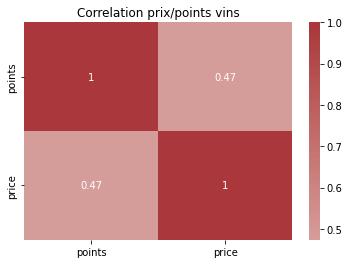

In [ ]:
vins_corr = df_vins.corr()
sns.heatmap(vins_corr,
            center=0,
            cmap="vlag",
            annot=True
            )

plt.title("Correlation prix/points vins")
plt.show()

* On observe une correlation de 0.47, la correlation est positive mais elle n'est pas très elevée. 

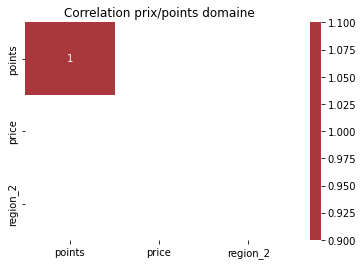

In [ ]:
domaine_corr = df_domaine.corr()
sns.heatmap(domaine_corr,
            center=0,
            cmap="vlag",
            annot=True
            )

plt.title("Correlation prix/points domaine")
plt.show()

* Ici c'est normal car les prix ne sont pas fixés

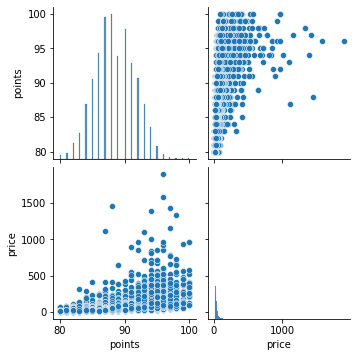

In [ ]:
sns.pairplot(df_vins)

In [ ]:
fig = px.scatter_matrix(df_vins,
    dimensions=["points", "price"])

fig.show()

In [ ]:
sns.pairplot(df_vins,
             hue='country')
plt.show()

* Ici on regarde en plus si le pays de provenance pour cette correlation entre les prix et les points attribués. 
* On observe que les vins provenant de France, du portugal, d'espagne, des états-unis et d'italie sont majoritairement présent.

In [ ]:
sns.pairplot(df_vins,
             hue='variety'
             )
plt.show()

In [ ]:
plt.boxplot(df_vins["points"])
plt.show()

In [ ]:
df_domaine[["points"]].boxplot()

### Foire à la Dataviz (idées de graphs)

#### Analyse des points

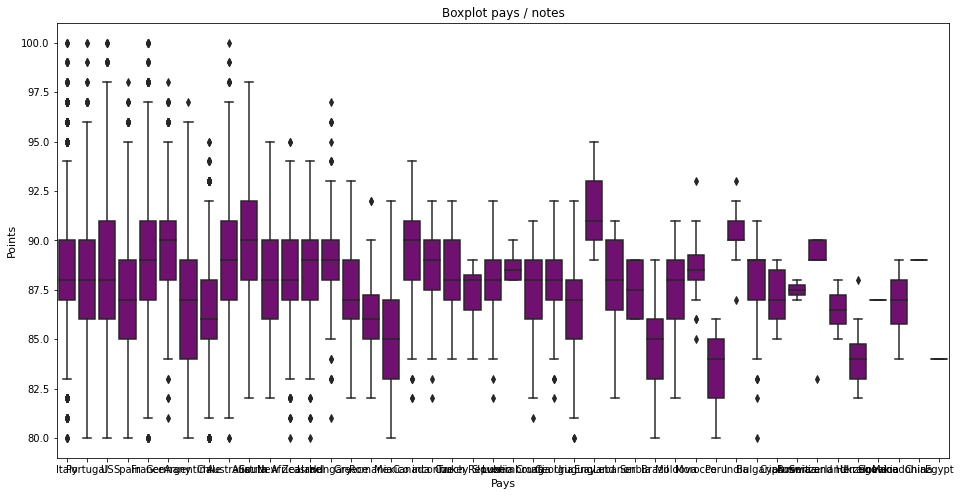

In [ ]:
ax, fig = plt.subplots(figsize=(16, 8))
sns.boxplot(x='country',
            y='points',
            data=df_vins,
            color='purple')
plt.title("Boxplot pays / notes")
plt.xlabel("Pays", size=11)
plt.ylabel("Points", size=11) 

plt.show()

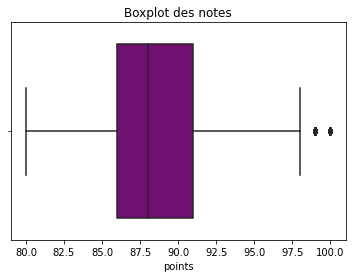

In [ ]:
sns.boxplot(x=df_vins['points'],
            color = 'purple')
plt.title("Boxplot des notes")
plt.show()

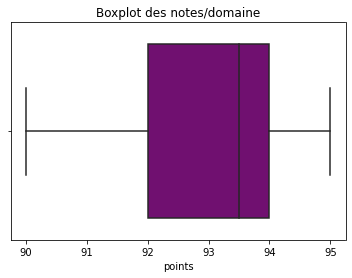

In [ ]:
sns.boxplot(x=df_domaine['points'],
            color='purple')
plt.title("Boxplot des notes/domaine")
plt.show()

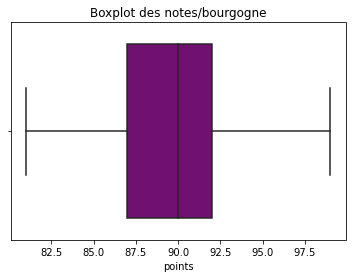

In [ ]:
sns.boxplot(x=df_vin_bourgogne['points'],
            color='purple')
plt.title("Boxplot des notes/bourgogne")
plt.show()

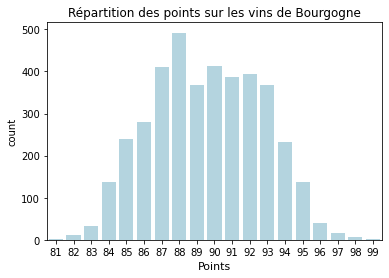

In [ ]:
sns.countplot(x = 'points',
              data=df_vin_bourgogne,
              color='lightblue')
plt.title("Répartition des points sur les vins de Bourgogne")
plt.xlabel("Points", size=11)  
    
plt.show()

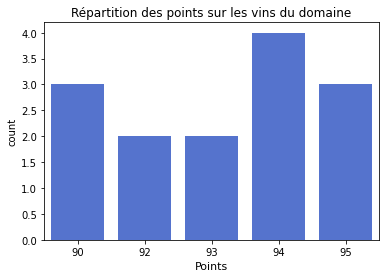

In [ ]:
sns.countplot(x = 'points',
              data=df_domaine,
              color='royalblue')
plt.title("Répartition des points sur les vins du domaine")
plt.xlabel("Points", size = 11)
    
plt.show()

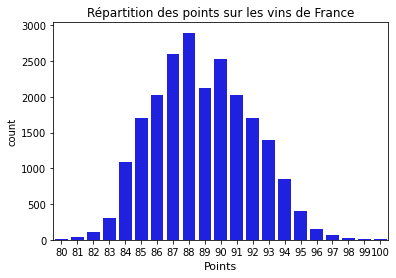

In [ ]:
sns.countplot(x = 'points',
              data=df_vin_france,
              color='blue'
              )
plt.title("Répartition des points sur les vins de France")
plt.xlabel("Points", size=11)

    
plt.show()

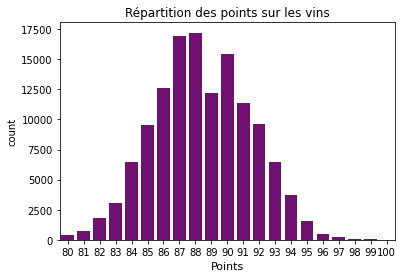

In [ ]:
sns.countplot(x = 'points',
              data=df_vins,
              color='purple'
              )
plt.title("Répartition des points sur les vins")
plt.xlabel("Points", size=11)

    
plt.show()

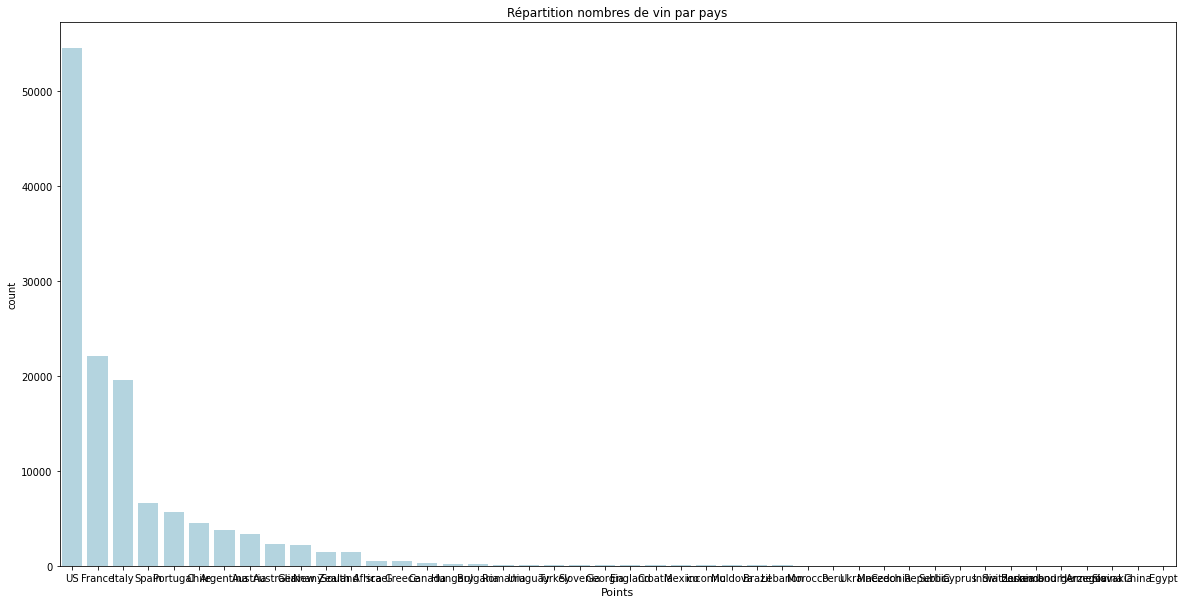

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'country',
              data=df_vins,
              order=df_vins['country'].value_counts().index,
              color='lightblue')
plt.title("Répartition nombres de vin par pays")
plt.xlabel("Points", size=11)  

    
plt.show()

#### Analyse des prix

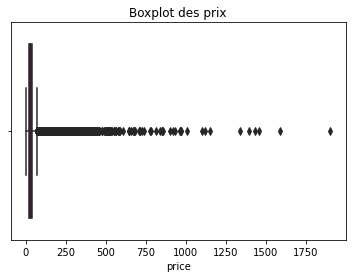

In [ ]:
#plt.figure(figsize=(12,7))
sns.boxplot(x=df_vins['price'],
            color='purple')
plt.title("Boxplot des prix")
plt.show()

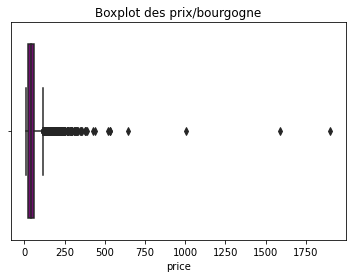

In [ ]:
#plt.figure(figsize=(12,7))
sns.boxplot(x=df_vin_bourgogne['price'],
            color='purple')
plt.title("Boxplot des prix/bourgogne")
plt.show()

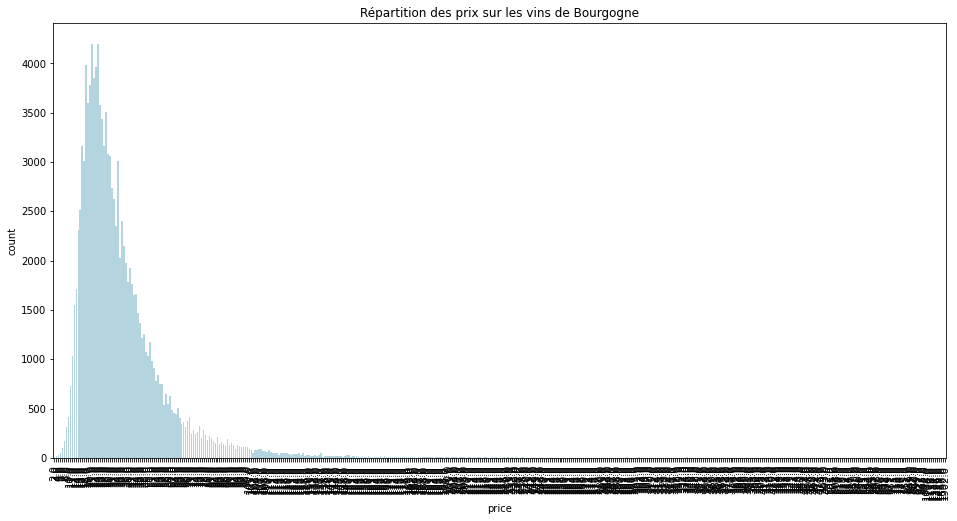

In [ ]:
ax, fig = plt.subplots(figsize = (16, 8))
sns.countplot(x = 'price',
              data=df_vins,
              color='lightblue')
plt.title("Répartition des prix sur les vins de Bourgogne") 
plt.xticks(rotation = 90)
    
plt.show()

#### Analyse pour le pinot noir

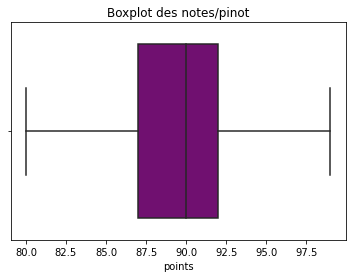

In [ ]:
#plt.figure(figsize=(12,7))
sns.boxplot(x=df_pinotnoir['points'],
            color='purple')
plt.title("Boxplot des notes/pinot")
plt.show()

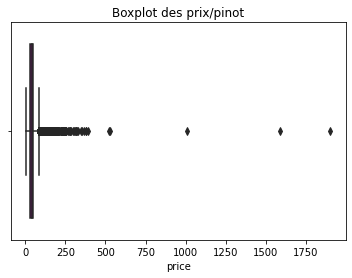

In [ ]:
#plt.figure(figsize=(12,7))
sns.boxplot(x=df_pinotnoir['price'],
            color='purple')
plt.title("Boxplot des prix/pinot")
plt.show()

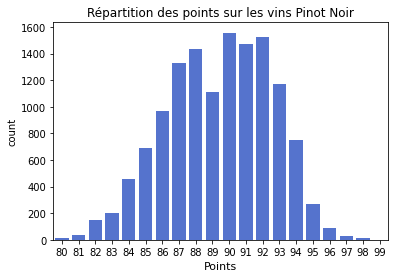

In [ ]:
sns.countplot(x = 'points',
              data=df_pinotnoir,
              color='royalblue')
plt.title("Répartition des points sur les vins Pinot Noir")
plt.xlabel("Points", size=11)  
    
plt.show()

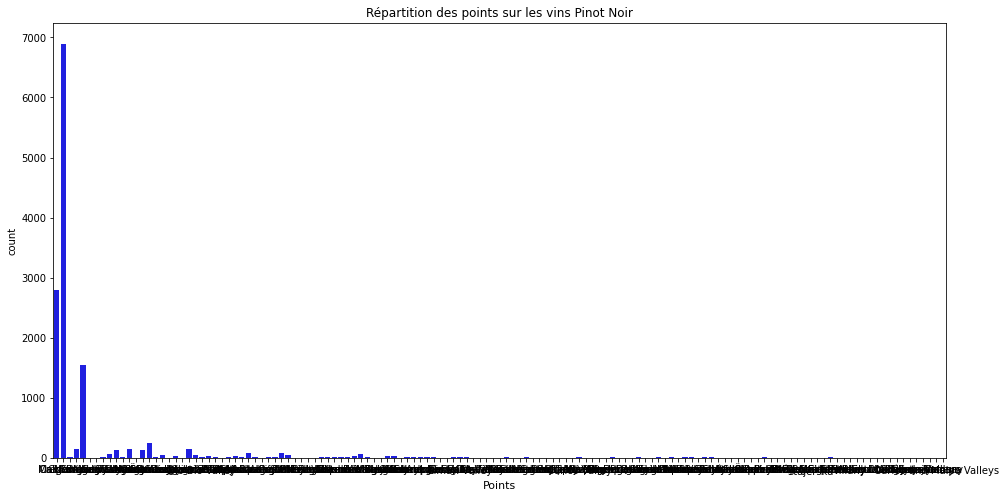

In [ ]:
fig = plt.subplots(figsize = (16, 8))
sns.countplot(x = 'province',
              data = df_pinotnoir,
              color = 'blue')
plt.title("Répartition des points sur les vins Pinot Noir")
plt.xlabel("Points", size = 11)  

    
plt.show()

#### Analyse sur les différentes colonnes

##### Année - Millesime

In [ ]:
df_vins['millesime'].value_counts()

2017    15853
2016    15723
2018    15561
2015    12525
2014    12148
        ...  
1503        1
1935        1
1969        1
1980        1
1945        1
Name: millesime, Length: 91, dtype: int64

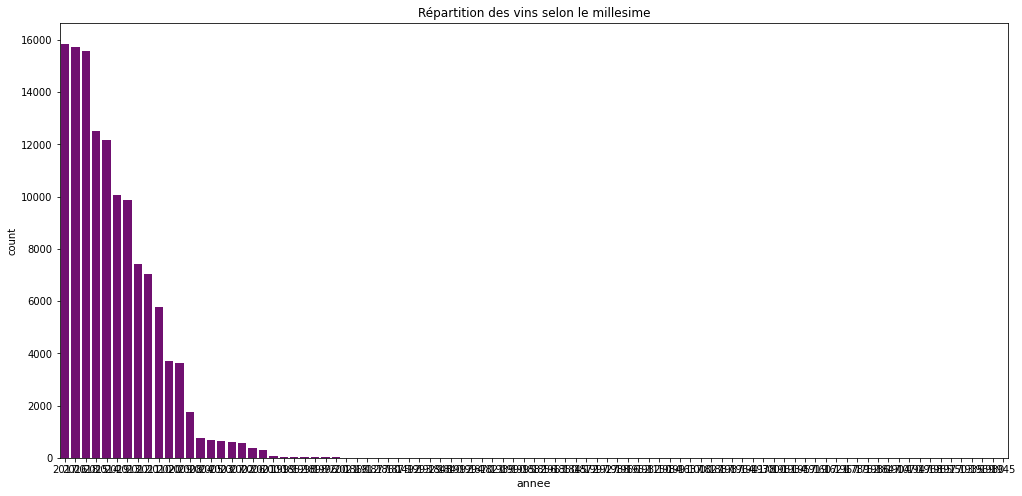

In [ ]:
fig = plt.subplots(figsize = (17, 8))
sns.countplot(x = 'millesime',
              data=df_vins,
              color='purple',
              order = df_vins['millesime'].value_counts().index
              )

plt.title("Répartition des vins selon le millesime")
plt.xlabel("annee", size = 11)


plt.show()

In [ ]:
df_vin_france['millesime'].value_counts()

2018    3517
2019    2651
2016    2146
2014    2115
2017    2087
2015    2003
2013    1494
2020    1081
2012     944
2010     720
2011     691
2009     440
2008     127
2004     114
2003      71
2007      67
2006      62
2002      61
2005      32
1999      17
2000      15
2001      13
1996       8
1998       5
1994       4
1992       4
1993       2
1989       2
1904       1
1986       1
1752       1
1945       1
Name: millesime, dtype: int64

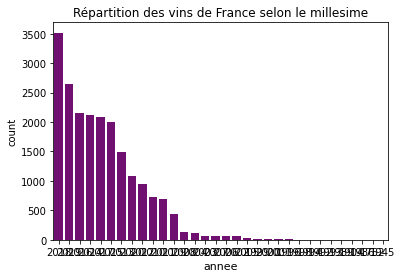

In [ ]:
sns.countplot(x = 'millesime',
              data=df_vin_france,
              color='purple',
              order=df_vin_france['millesime'].value_counts().index)

plt.title("Répartition des vins de France selon le millesime")
plt.xlabel("annee", size=11)


plt.show()

In [ ]:
df_vin_bourgogne['millesime'].value_counts()

2018    786
2014    499
2017    442
2019    428
2015    386
2016    341
2013    238
2012    237
2010    192
2011    130
2009    128
2020     63
2004     15
2002      8
2003      7
2007      4
2008      3
2001      1
2006      1
Name: millesime, dtype: int64

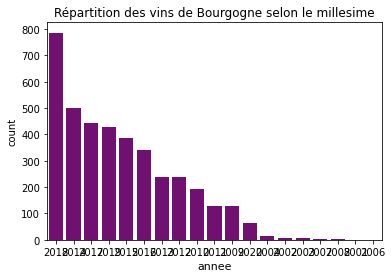

In [ ]:
sns.countplot(x = 'millesime', data=df_vin_bourgogne,
              color='purple',
              order=df_vin_bourgogne['millesime'].value_counts().index)

plt.title("Répartition des vins de Bourgogne selon le millesime")
plt.xlabel("annee", size=11)


plt.show()

In [ ]:
df_pinotnoir['millesime'].value_counts()

2018    2314
2017    2062
2016    1914
2014    1206
2015    1175
2019    1000
2013     944
2012     661
2010     567
2011     541
2009     289
2020     117
2002     103
2005      61
2004      58
2003      55
2008      36
2001      11
2006       9
2007       7
2000       2
1789       1
1852       1
Name: millesime, dtype: int64

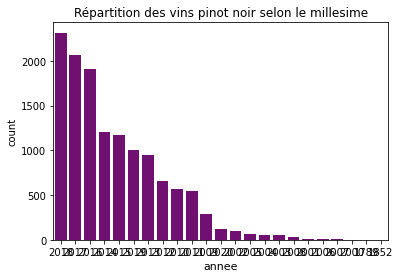

In [ ]:
sns.countplot(x = 'millesime', data=df_pinotnoir,
              color='purple',
              order=df_pinotnoir['millesime'].value_counts().index)

plt.title("Répartition des vins pinot noir selon le millesime")
plt.xlabel("annee", size=11)


plt.show()

In [ ]:
df_pinotnoir_domaine['millesime'].value_counts()

2018    4
2016    3
2017    2
2019    2
2015    1
2014    1
Name: millesime, dtype: int64

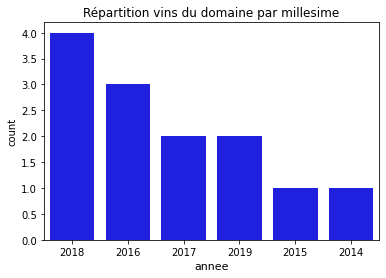

In [ ]:
sns.countplot(x = 'millesime',
              data=df_pinotnoir_domaine,
              color='blue',
              order=df_pinotnoir_domaine['millesime'].value_counts().index
              )

plt.title("Répartition vins du domaine par millesime")
plt.xlabel("annee", size = 11)


plt.show()

* **Reprise et poursuite de l'analyse sur Tableau**

# 💬 V - Description mots

## Préparation générale

In [ ]:
# Ajout des stopwords 
stopwordsenglish = list(nltk.corpus.stopwords.words("english"))

In [ ]:
liste_mots_vin = ["wine", "drink"]

In [ ]:
stopwordsenglish.extend(liste_mots_vin)

In [ ]:
# Création d'une fonction de clean de la colonne

def func_clean2(phrase):

    sentence_upt = ""
    tokens_clean = []

    sent_tokens = nltk.word_tokenize(phrase.lower())
    for words in sent_tokens:
        if words not in stopwordsenglish and not words.isnumeric():
            tokens_clean.append(words)
    f_sentence = ' '.join(tokens_clean)
    f_sentence = re.sub(r'[^\w\s]', '', f_sentence)

    return f_sentence




## Application au df_bourgogne

In [ ]:
# Application de la fonction à la colonne description

df_vin_bourgogne['col_clean'] = df_vin_bourgogne['description'].apply(func_clean2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_vin_bourgogne['col_clean'].map(word_tokenize)

65        [warm, vintage, soft, fruity, s, open, broad, ...
66        [soft, rounded, ripe, generous, pear, melon, f...
179       [impact, 50year, old, vines, seen, concentrate...
193       [citrusdominated, lime, lemon, giving, crisp, ...
307       [rich, full, mouth, packed, red, fruits, black...
                                ...                        
129804    [concentrated, dark, tannins, go, ripe, fruit,...
129809    [aromas, ripe, yellow, fruits, announce, rich,...
129811    [fresh, juicy, attractive, acidity, red, berry...
129917    [powerful, chunky, packed, solid, tannins, pro...
129922    [blend, several, premier, cru, vineyards, pomm...
Name: col_clean, Length: 3966, dtype: object

In [ ]:
# préparation du texte propre

colonne_propre = " ".join([str(word) for word in df_vin_bourgogne['col_clean']])
colonne_propre

'warm vintage  soft fruity  s open broad white fruit flavors  acidity lighter usual chablis  giving particularly ripe character   soft  rounded ripe generous pear melon flavors  s easy ready young smooth  attractively ripe character  impact 50year old vines seen concentrated fruit  ripe full   flavors fresh apricots  edged green apples pink grapefruit  combination shows richness great freshness  finish reminder fine acidity  citrusdominated  lime lemon giving crisp intensity  somewhat bitter toast element  acidity  fresh fruits soft structure act counterbalance  give six months year  screwcap  rich full mouth  packed red fruits black cherries  sweet  keeping tannic core  next year  beautiful  rich yellow fruits concentrated  tightly textured conveys ripe character  touches wood right  adding spice opulent fruitiness  mineral texture gives tightness aftertaste   produced vines years old heart clos de vougeot vineyard  impressive long future  wood aging already surrounded ripe  intense b

### ☁️ Wordcloud Bourgogne 

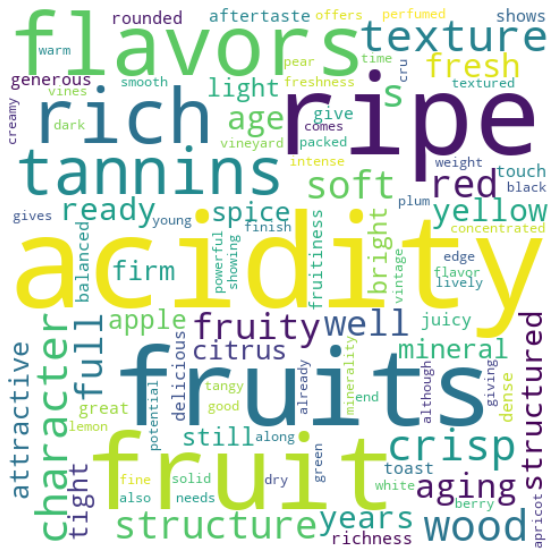

In [ ]:
wordcloud = WordCloud(width=480,
                      height=480,
                      max_font_size=200,
                      min_font_size=10,
                      background_color="white"
                      )

token_mots_deux = nltk.word_tokenize(colonne_propre)
mot_fdist_deux = nltk.FreqDist(token_mots_deux)
wordcloud.generate_from_frequencies(mot_fdist_deux)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Application au df de vin français

In [ ]:
# Application de la fonction à la colonne description

df_vin_france['col_clean'] = df_vin_france['description'].apply(func_clean2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# préparation du texte propre

colonne_propre_vinfr = " ".join([str(word) for word in df_vin_france['col_clean']])
colonne_propre_vinfr

'dry restrained offers spice profusion  balanced acidity firm texture  s much food  great depth flavor fresh apple pear fruits touch spice  s dry balanced acidity crisp texture   dry  spicy  tight  taut texture strongly mineral character layered citrus well pepper  s food almost crisp aftertaste  red cherry fruit comes laced light tannins  giving bright open  juicy character  festive  soft  ripe fruit acidity  plus red berry flavor  soft fruity  generous  ripe s full juicy redcherry fruits gentle tannins  richness  giving sweet character open  readytodrink  fruity lightly herbaceous  fine textured acidity along pink grapefruit flavor  bright easy  ready months  fat  yeasty champagne comprised predominantly pinot noir  ripe red berry fruit  light acidity soft  creamy aftertaste  s ready  warm vintage  soft fruity  s open broad white fruit flavors  acidity lighter usual chablis  giving particularly ripe character   soft  rounded ripe generous pear melon flavors  s easy ready young smooth

### ☁️ Wordcloud vin français

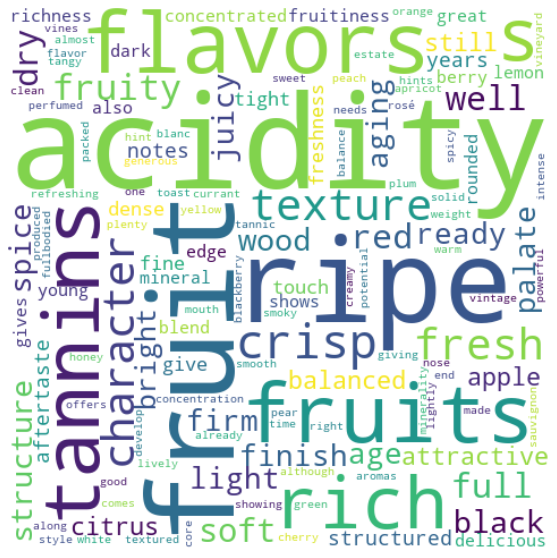

In [ ]:
wordcloud_vinfr = WordCloud(width=480,
                      height=480,
                      max_font_size=200,
                      min_font_size=10,
                      background_color="white"
                      )

token_mots_vinfr = nltk.word_tokenize(colonne_propre_vinfr)
mot_fdist_vinfr = nltk.FreqDist(token_mots_vinfr)
wordcloud_vinfr.generate_from_frequencies(mot_fdist_vinfr)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_vinfr, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Application au df pinotnoir

In [ ]:
# Application de la fonction à la colonne description

df_pinotnoir['col_clean'] = df_pinotnoir['description'].apply(func_clean2)

In [ ]:
# préparation du texte propre

colonne_propre_pinot = " ".join([str(word) for word in df_pinotnoir['col_clean']])
colonne_propre_pinot

'much like regular bottling  comes across rather rough tannic  rustic  earthy  herbal characteristics  nonetheless  think pleasantly unfussy country  s good companion hearty winter stew  sleek mix tart berry  stem herb  along hint oak chocolate  fair value widely available  drinknow oregon pinot  oakaged six months  whether neutral restaved indicated  oak earth intermingle around robust aromas wet forest floor vineyarddesignated pinot hails highelevation site  small production  offers intense  fullbodied raspberry blackberry steeped smoky spice smooth texture  many erath vineyard designates  strongly herbal  notes leaf herb create somewhat unripe flavor impressions  touch bitterness finish  fruit passes ripeness sweet tomatoes  stiff  tannic  slowly opens brings brambly berry flavors play  along notes earthy herbs  s touch bitterness tannins  lightly herbal strawberry raspberry aromas authentic fresh  palate  light juicy  snappy  lean flavors red fruit dry spice  finish dry oaky  rosés

### ☁️ Wordcloud pinot noir

In [ ]:
wordcloud_pinot = WordCloud(width=480,
                      height=480,
                      max_font_size=200,
                      min_font_size=10,
                      background_color="white"
                      )

token_mots_pinot = nltk.word_tokenize(colonne_propre_pinot)
mot_fdist_pinot = nltk.FreqDist(token_mots_pinot)
wordcloud_pinot.generate_from_frequencies(mot_fdist_pinot)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_pinot, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Application au df du domaine

In [ ]:
# Application de la fonction à la colonne description

df_domaine['col_clean'] = df_domaine['description'].apply(func_clean2)

In [ ]:
# préparation du texte propre
colonne_propre_domaine = " ".join([str(word) for word in df_domaine['col_clean']])
colonne_propre_domaine

### ☁️ Wordlcoud df domaine

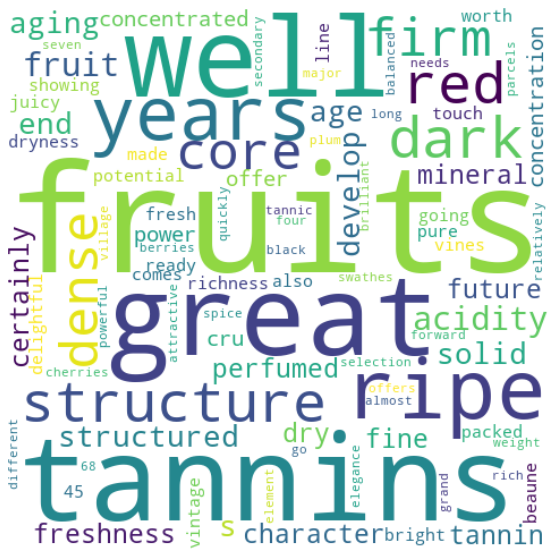

In [ ]:
wordcloud_domaine = WordCloud(width=480,
                      height=480,
                      max_font_size=200,
                      min_font_size=10,
                      background_color="white"
                      )

token_mots_domaine = nltk.word_tokenize(colonne_propre_domaine)
mot_fdist_domaine = nltk.FreqDist(token_mots_domaine)
wordcloud_domaine.generate_from_frequencies(mot_fdist_domaine)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_domaine, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Application au df de vin général

In [ ]:
df_vins['col_clean'] = df_vins['description'].apply(func_clean2)

In [ ]:
# préparation du texte propre
colonne_propre_vins = " ".join([str(word) for word in df_domaine['col_clean']])
colonne_propre_vins

'firm solid great swathes black fruits well dense tannins  ripe fruits major element concentrated  power firm tannic core  certainly needs aging seven years  rich great fruits well structure  weight great concentration grand cru selection  plum fruits acidity offer potential long aging  s powerful  also showing elegance  age 68 years  perfumed village  made four different parcels  offers attractive touch tannin spice go forward red fruits  develop relatively quickly  ready  structured  packed red fruits delightful acidity  core dark tannin solid structure well bright freshness end  structure  s worth aging 45 years  perfumed cherries red berries  structure  certainly  almost secondary brilliant fruit  balanced mineral dryness  certainly going age ripe  purefruited   structured  packed red fruits delightful acidity  core dark tannin solid structure well bright freshness end  structure  s worth aging 45 years  firm  fine tannins  also pure line fresh strawberry fruits develop tannins sof

### ☁️ Wordcloud df global

In [ ]:
wordcloud_vins = WordCloud(width=480,
                      height=480,
                      max_font_size=200,
                      min_font_size=10,
                      background_color="white"
                      )

token_mots_vins = nltk.word_tokenize(colonne_propre_vins)
mot_fdist_vins = nltk.FreqDist(token_mots_vins)
wordcloud_vins.generate_from_frequencies(mot_fdist_vins)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_vins, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Export des df pour Tableau

In [ ]:
from google.colab import files

In [ ]:
df_vins.to_csv('df_vins.csv', encoding = 'utf-8-sig')

In [ ]:
files.download('df_vins.csv')

In [ ]:
df_domaine.to_csv('df_domaine.csv', encoding = 'utf-8-sig')

In [ ]:
files.download('df_domaine.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>